In [15]:
import csv
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [17]:
dates = []
prices = []

In [9]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader) # Skip column headers
        day = 0
        for row in csvFileReader:
            day += 1
            dates.append(day)
            prices.append(float(row[5]))
    return

In [10]:
# dates: the list of dates in integer type
# prices: the opening price of stock for the corresponding date
# x: the date for which we want to predict the price
def predict_price(dates,prices,x):
    linear_mod = linear_model.LinearRegression() #defining the linear regression
    dates = np.reshape(dates, (len(dates), 1)) # convert to nx1 matrix (n rows, 1 column)
    prices = np.reshape(prices, (len(prices), 1)) 
    # Fit the estimator linear_mod (Gotta get that maximum likelihood estimate)
    linear_mod.fit(dates, prices) # fit the data points to the model (Learn from the model)
    predicted_price = linear_mod.predict(x)
    return predicted_price[0][0], linear_mod.coef_[0][0], linear_mod.intercept_[0]

In [11]:
def show_plot(dates, prices):
    linear_mod = linear_model.LinearRegression()
    dates = np.reshape(dates, (len(dates), 1))
    prices = np.reshape(prices, (len(prices), 1)) 
    linear_mod.fit(dates, prices)
    plt.scatter(dates, prices, color='yellow')

    plt.plot(dates, linear_mod.predict(dates), color='blue', linewidth=3)
    plt.show()
    return

In [13]:
dates

[]

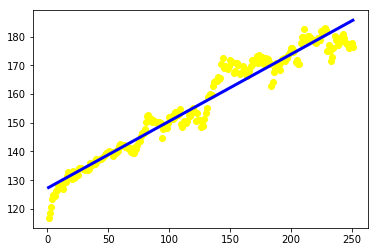

186.6574506740125, 0.23318818073989753, 127.19446458533862


In [18]:
get_data('FB.csv')
show_plot(dates, prices)
predicted_price, coefficient, constant = predict_price(dates, prices, 255)
print ("{0}, {1}, {2}".format(predicted_price, coefficient, constant))
